In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVR
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/mwardeh-png/Intro-to-ML/main/Housing.csv"
hf = pd.read_csv(url)
hf.head()
     

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<b>Pre-processing

In [53]:
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

hf[variable_list] = hf[variable_list].apply(binary_mapping)
hf = hf.drop('furnishingstatus', axis=1)

x = StandardScaler().fit_transform(hf)
y = hf.pop('price')

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)
hf.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0


<b>Linear SVR without PCA

In [54]:
classifier = SVR(kernel='linear')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

<b>Plotting

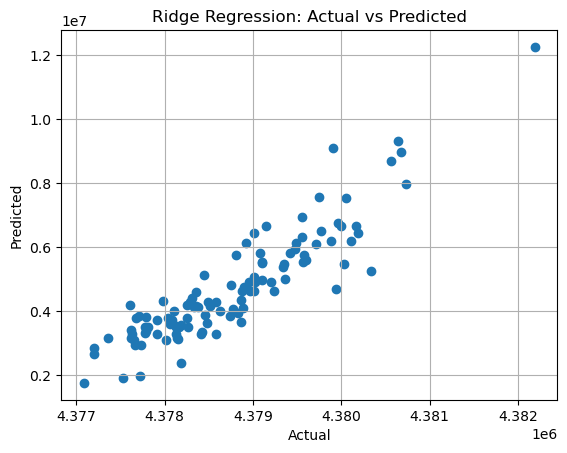

In [55]:
plt.scatter(y_pred, y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.grid(True)

In [7]:
def svm_train(x, y, kern, K):
  accuracies = []
  accuracy = 0
  low = float('inf')

  for N in K:
    pca = PCA(n_components=N)
    principalDf = pd.DataFrame(pca.fit_transform(x))
    newX = principalDf.values

    x_train, x_test, y_train, y_test = train_test_split(newX, y, train_size=0.8, test_size=0.2, random_state=0)

    if kern == 'linear':
            classifier = SVR(kernel=kern, C=1)
    elif kern == 'poly':
            classifier = SVR(kernel=kern, degree=2, C=1)
    else:
            classifier = SVR(kernel=kern, C=1, gamma='scale')

    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)

    accuracy = mean_squared_error(y_test, y_pred)
    accuracies.append(accuracy)

    if accuracy < low:
      low = accuracy
      optimal_k = N

  return accuracies, low, optimal_k

Linear Kernal Accurcies [2035880430383.0742, 2035486354671.7139, 2035478171396.232, 2035488965531.479, 2035430597469.1047, 2035427065709.3071, 2035428448010.0347, 2035424780908.636, 2035423653525.5078, 2035421831509.1987, 2035421838501.9246] 
Optimal K: 10 
Lowest Error:  2035421831509.1987

RBF Kernal Accurcies [3000141079406.065, 3000141079434.8936, 3000141079461.471, 3000141079484.738, 3000141079483.4204, 3000141079498.18, 3000141079505.54, 3000141079511.6426, 3000141079517.2905, 3000141079523.151, 3000141079524.779] 
Optimal K: 1 
Lowest Error:  3000141079406.065

Poly Kernal Accurcies [3000092063188.6616, 3000092063313.093, 3000092063381.5625, 3000092063421.8135, 3000092063447.6714, 3000092063465.7783, 3000092063482.235, 3000092063494.308, 3000092063501.2954, 3000092063510.227, 3000092063514.388] 
Optimal K: 1 
Lowest Error:  3000092063188.6616


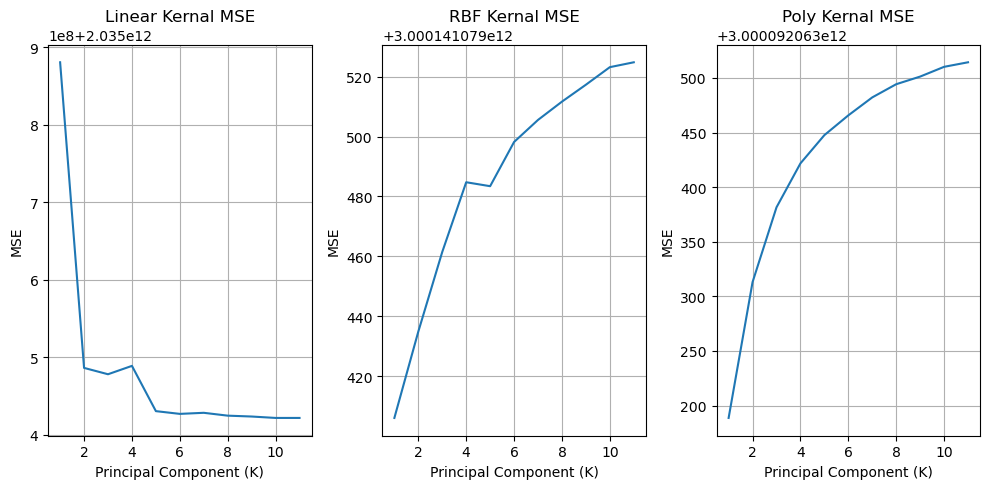

In [10]:
k = range(1, x.shape[1])
lin_accuracies, lin_low, lin_K = svm_train(hf, y, 'linear', k)
rbf_accuracies, rbf_low, rbf_K = svm_train(hf, y, 'rbf', k)
poly_accuracies, poly_low, poly_K = svm_train(hf, y, 'poly', k)


print('Linear Kernal Accurcies', lin_accuracies, '\nOptimal K:', lin_K, '\nLowest Error: ', lin_low)
print('\nRBF Kernal Accurcies', rbf_accuracies, '\nOptimal K:', rbf_K, '\nLowest Error: ', rbf_low)
print('\nPoly Kernal Accurcies', poly_accuracies, '\nOptimal K:', poly_K, '\nLowest Error: ', poly_low)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k, lin_accuracies)
plt.title('Linear Kernal MSE')
plt.xlabel('Principal Component (K)')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k, rbf_accuracies )
plt.title('RBF Kernal MSE')
plt.xlabel('Principal Component (K)')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k, poly_accuracies)
plt.title('Poly Kernal MSE')
plt.xlabel('Principal Component (K)')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()

<b>Difrent Method For HW4Q2

<b>Step 1: Load and Preprocess the Data

In [32]:
import pandas as pd

# Load the CSV file
file_path = 'https://raw.githubusercontent.com/mwardeh-png/Intro-to-ML/main/Housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<b>Step 2: Preprocess the Data

In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_enc = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Encode categorical columns
for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col])

# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Display the preprocessed data
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<b>Step 3: Develop the SVR Model and Plot the Results

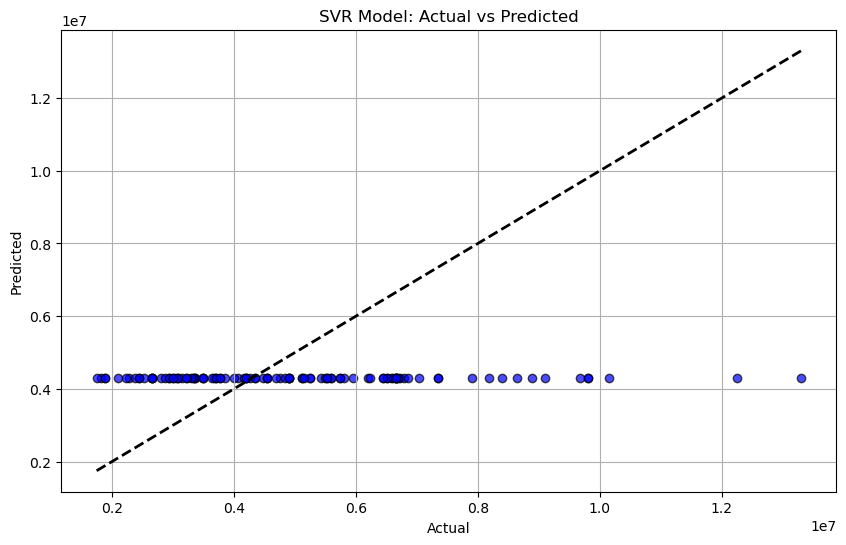

(5567932065580.117, -0.10156389053848902)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model
svr = SVR(kernel='rbf')

# Fit the model
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Model: Actual vs Predicted')
plt.grid(True)
plt.show()

mse, r2


<b>Step 4: Compare SVR Results with Linear Regression with Regularization

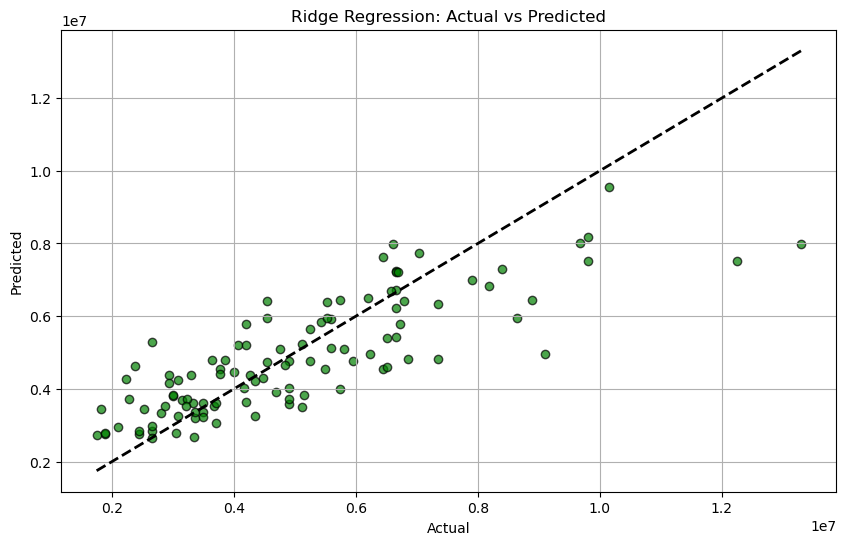

(1774225918472.8787, 0.6489858025515296)

In [41]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge = Ridge(alpha=1.0)

# Fit the model
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Calculate performance metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

mse_ridge, r2_ridge


<b>Step 5: Use PCA for Feature Extraction and Determine Optimum Number of Principal Components

In [42]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline with PCA and SVR
pipe = Pipeline([
    ('pca', PCA()),
    ('svr', SVR(kernel='rbf'))
])

# Define the parameter grid
param_grid = {
    'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'svr__C': [0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'pca__n_components': 2, 'svr__C': 100}, -0.06243243184124987)

<b>Step 6: Explore Different Kernel Tricks and Compare Accuracies

In [44]:
# Define the kernel types to explore
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
results = {}

for kernel in kernels:
    # Initialize the SVR model with the specified kernel
    svr_kernel = SVR(kernel=kernel, C=100)
    
    # Create a pipeline with PCA and SVR
    pipe_kernel = Pipeline([
        ('pca', PCA(n_components=2)),
        ('svr', svr_kernel)
    ])
    
    # Fit the model
    pipe_kernel.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_kernel = pipe_kernel.predict(X_test)
    
    # Calculate performance metrics
    mse_kernel = mean_squared_error(y_test, y_pred_kernel)
    r2_kernel = r2_score(y_test, y_pred_kernel)
    
    # Store the results
    results[kernel] = (mse_kernel, r2_kernel)

results


{'linear': (3705698234615.1494, 0.26686185887238034),
 'poly': (5312237486713.303, -0.050977081689415504),
 'sigmoid': (5545478858338.576, -0.09712173103784472),
 'rbf': (5551451470930.546, -0.09830335722975914)}